<a href="https://colab.research.google.com/github/ellennilsson02-dev/BERN02-FAIR/blob/main/BERN02FAIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FAIR workflows**
The workflow below is in accordance with FAIR principles in several ways.

It is **Findable** because it is posted publicly on the repository github. It is, however, not guaranteed that github will operate at a given future time point, since it is a privately run company. A better repository would be Zenodo which is run by the European council.

The code is **Accessible** as the license for it (MIT) is non restrictive. Metadata is also stored in widely accessible formats such as in a README file etc. Prerequisites to run the code are also clearly stated in the workflow.

The code has some **Interoperability** but could be improved on this point. The file reading requires the user to change the code to work with their specific data file. If the program had contingencies in place to work with several file formats and had the ability to filter out non-relevant data, the interoperability would increase significantly.

Lastly the code is **Reusable** as it has a non restirictive license and sufficient metadata to run without the original creator.

Note: The code was created for the course KEMA92 at the Department of Chemistry. The code was initially written in Swedish, ChatGPT was used to translate it into English.


## **Jablonski diagram generator**
The following program creates a simple Jablonski diagram from an absorbance spectrum.

### What is a Jablonski diagram?
![Jablonskidiagram](https://www.omegafilters.com/sites/default/files/images/FluorescenceFilters/FluorescenceJablonski_0.png)

[Source](https://www.omegafilters.com/fluorescence_overview)

Jablonski diagrams are a way of visualizing transitions between the different electron states in a molecule. In the image above, the purple region shows how absorbtion at three different wavelengths corresponds to three different transitions from the ground state ($S_o$) to the first excited level ($S_1$) as well as different vibrational states ($v$) witihin this excitational level. A longer distance between states means that a higher energy is needed to facilitiate excitation. Short-wavelength light contains the most energy and absorbtion of this thereby causes excitation to higher states than light with longer wavelengths. The blue region in the image also shows how the corresponding relaxation causes emission.

### What can the code do?
This program extracts the peaks in an absorbance spectrum and visualizes the transitions from the ground state to the corresponding excited state. It also provides a rough estimate of the color of the light that was absorbed. The code cannot, however, identify the specific states, i.e which excited or vibrational state the transition reaches.


### Prerequisites
Data reading is handled manually, information required to run code is:
* separator type
* row to begin reading data from
* number of peaks to plot transitions for

For this program to work, the data cannot be spiky as the absorbance maxima will not be detected correctly. Data wrangling in the form of smoothing is therefore recommended to do beforehand.




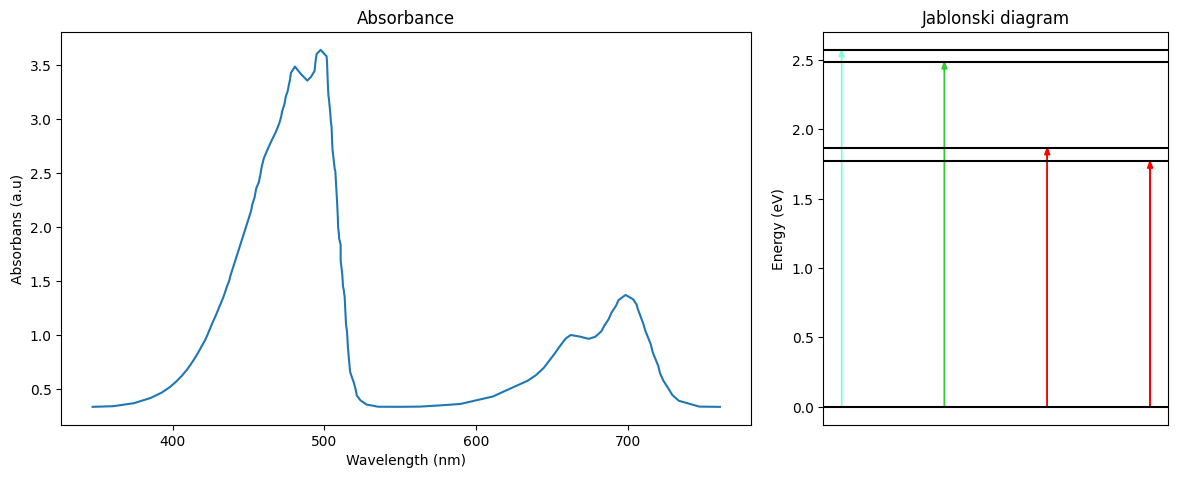

Absorbance maximum (and transitions) occur at wavelengths: 480.6, 497.6, 662.4, 698.6 nm.


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


data = r'/content/FAIRdata.txt'

# Input, change to suit data file
separator = '\t'
row = 0 # row to begin reading data from
n = 4   # number of peaks to display (can be larger than actual)

# Load data
nm, Abs = [], []
with open(data) as f:
    lines = f.read().splitlines()
    for line_number in range(row, len(lines)):
        line = lines[line_number]
        if line.strip():  # skip empty rows
            x, y = line.split(separator)
            nm.append(float(x))
            Abs.append(float(y))

# Find local maxima
max_idx = []
for i in range(1, len(Abs)-1):   # start at 1, stop before last
    if Abs[i-1] < Abs[i] >= Abs[i+1]:
        max_idx.append(i)

# Pick n largest maxima
max_values = [Abs[i] for i in max_idx]
max_sorted = sorted(max_values, reverse=True)
nmax = max_sorted[:n]

# Get indexes of selected maxima
indexes = [i for i in range(len(Abs)) if Abs[i] in nmax]

# Convert wavelength to energy
wvlgth = np.array([nm[i] for i in indexes])

# Constants
h = 6.62607e-34  # Js
c = 2.99e8       # m/s
eV = 1.602e-19   # J

energy = h * c / ((wvlgth * 1e-9) * eV)
rounded_wvlgth = [round(x, 1) for x in wvlgth]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5),
                               gridspec_kw={'width_ratios': [2, 1]})

# Absorbance spectrum
ax1.plot(nm, Abs)
ax1.set_title("Absorbance")
ax1.set_xlabel("Wavelength (nm)")
ax1.set_ylabel("Absorbans (a.u)")

# Jablonski diagram
ax2.set_title("Jablonski diagram")
ax2.set_ylabel("Energy (eV)")
ax2.axhline(y=0, color='k', linestyle='-')

xstart = 0
for e in energy:
    # assign colors
    if e > 3.091752:
        colour = 'indigo'
    elif 2.944526 < e <= 3.091752:
        colour = 'darkviolet'
    elif 2.810684 < e <= 2.944526:
        colour = 'blueviolet'
    elif 2.603581 < e <= 2.810684:
        colour = 'blue'
    elif 2.498386 < e <= 2.603581:
        colour = 'aquamarine'
    elif 2.248547 < e <= 2.498386:
        colour = 'limegreen'
    elif 2.1696951 < e <= 2.248547:
        colour = 'greenyellow'
    elif 2.114019 < e <= 2.1696951:
        colour = 'gold'
    elif 1.994679 < e <= 2.114019:
        colour = 'darkorange'
    elif 1.741832 < e <= 1.994679:
        colour = 'red'
    elif 1.671218 < e <= 1.741832:
        colour = 'firebrick'
    else:
        colour = 'darkred'

    # energy line and arrow
    ax2.axhline(y=e, color='k', linestyle='-')
    ax2.arrow(xstart, 0, 0, e-0.05,
              head_width=0.05, head_length=0.05,
              fc=colour, ec=colour)
    xstart += 1

# Hide x-axis
ax2.get_xaxis().set_visible(False)

plt.tight_layout(pad=1.5)
plt.show()

print(
    "Absorbance maximum (and transitions) occur at wavelengths:",
    ", ".join(str(x) for x in rounded_wvlgth), "nm."
)

In [ ]:
!python --version
print(matplotlib.__version__)
print(np.__version__)

Python 3.12.11
3.10.0
2.0.2


Dependencies:
- Python: 3.12.11
- matplotlib: 3.10.0
- numpy: 2.0.2

Pinning:
The versions specified are the latest versions the code has been tested in. This does not mean that previous or future versions will not work. Future package breaking may not affect the function of the code as very simple modules are being used.
